<a href="https://colab.research.google.com/github/wama-nigam/mnist-digit-classification-using-neural-network/blob/main/mnist_digit_classification_using_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data : 60000 images of 28x28 dimension(numpy array)



Test data: 10000 images of 28x28 dimensions


Output for training data : 60000


Output for training data : 10000

In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
X_train[50]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12,  56, 140,
        126, 175, 200,  96,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  35, 166, 238, 254, 246,
        242, 253, 246, 254,  67,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

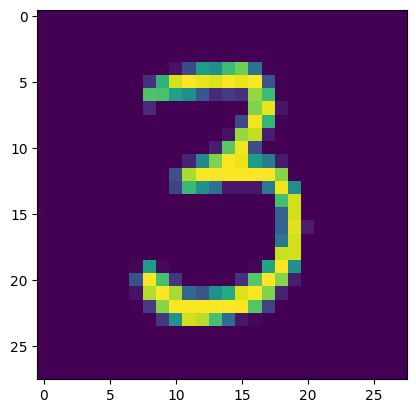

In [6]:
plt.imshow(X_train[50])

In [7]:
Y_train[50]

3

Normalize intensity between 0-1

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train[50]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

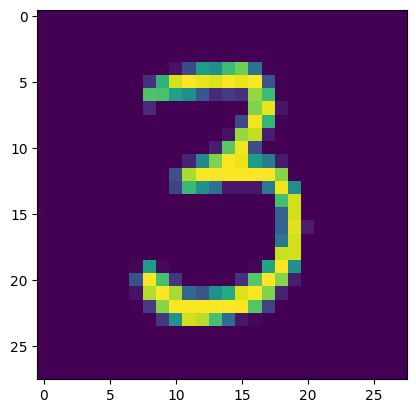

In [10]:
plt.imshow(X_train[50])

Class labels

In [11]:
print(np.unique(Y_train),np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9] [0 1 2 3 4 5 6 7 8 9]


**Building Model**
1. Setting up layers
2. Compiling Model
3. Training Model

In [12]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid'),
])

In [13]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2947 - accuracy: 0.9153
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1390 - accuracy: 0.9581
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1020 - accuracy: 0.9693
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0844 - accuracy: 0.9738
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0693 - accuracy: 0.9790
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0611 - accuracy: 0.9809
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0521 - accuracy: 0.9836
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0469 - accuracy: 0.9849
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0399 - accuracy: 0.9871
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.035

In [15]:
test_loss,test_accuracy = model.evaluate(X_test,Y_test)
print(test_accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.1059 - accuracy: 0.9733
0.9732999801635742


Test data Accuracy : 97.33

In [16]:
Y_predict = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [17]:
Y_predict.shape

(10000, 10)

In [18]:
Y_predict[10]

array([1.00000000e+00, 1.17825235e-04, 9.69643712e-01, 1.59074587e-03,
       2.46689183e-07, 5.04649244e-04, 8.39161456e-01, 1.49346650e-01,
       5.88476658e-03, 8.24628890e-01], dtype=float32)

Converting prediction of a point in each class to a class label

In [19]:
Y_pred_labels = [np.argmax(i) for i in Y_predict]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 2, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 8, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [20]:
confusion_mat = confusion_matrix(Y_test,Y_pred_labels)

In [21]:
confusion_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    0,    1,    1,    2,    2,    2,    2,    0],
       [   0, 1125,    1,    1,    0,    2,    3,    0,    3,    0],
       [   3,    3, 1005,    4,    4,    0,    2,    5,    6,    0],
       [   0,    0,    7,  971,    0,   18,    2,    6,    2,    4],
       [   0,    1,    3,    0,  957,    1,    5,    0,    2,   13],
       [   2,    0,    0,    6,    0,  870,    5,    1,    5,    3],
       [   4,    2,    1,    2,    6,    5,  934,    0,    4,    0],
       [   0,    5,   12,    3,    0,    0,    0, 1004,    1,    3],
       [   6,    0,    1,   13,    4,   19,    4,    4,  921,    2],
       [   5,    2,    1,    7,    6,    4,    1,    4,    6,  973]],
      dtype=int32)>

Text(0.5, 80.7222222222222, 'Predicted Labels')

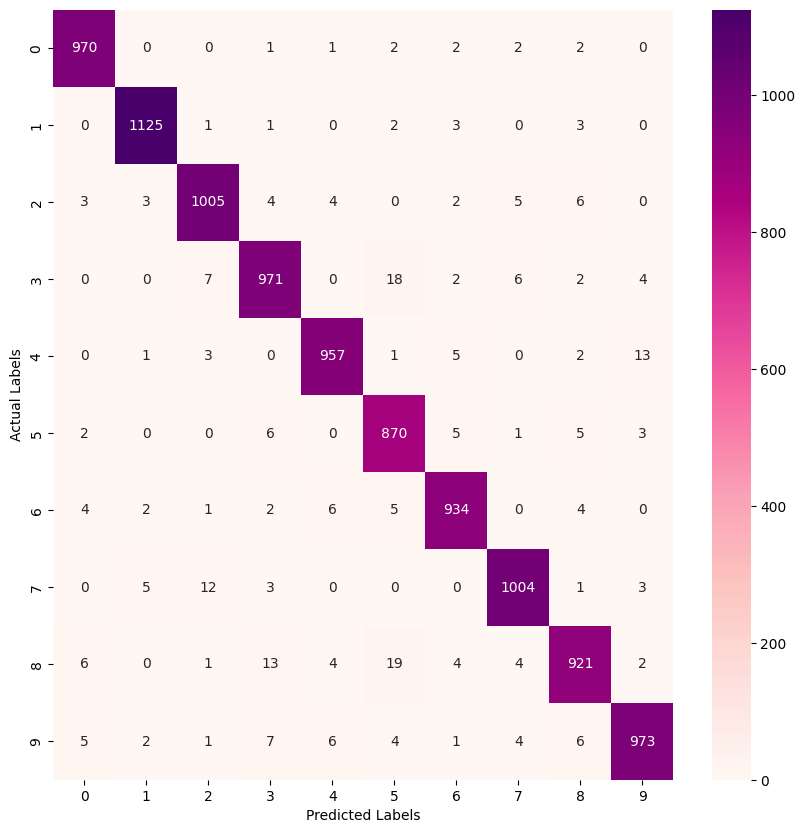

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='RdPu')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')

In [27]:
path='/content/predict_img.png'

In [29]:
input_img = cv2.imread(path)

In [30]:
type(input_img)

numpy.ndarray

In [31]:
input_img.shape

(318, 318, 3)

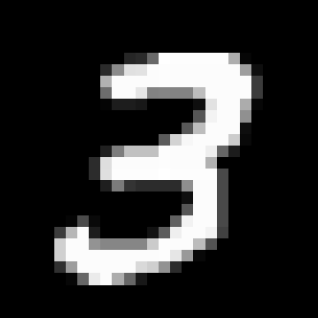

In [33]:
cv2_imshow(input_img)

In [34]:
gray_img = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)

In [35]:
gray_img.shape

(318, 318)

In [36]:
gray_img_resize =  cv2.resize(gray_img, (28, 28))

In [37]:
gray_img_resize.shape

(28, 28)

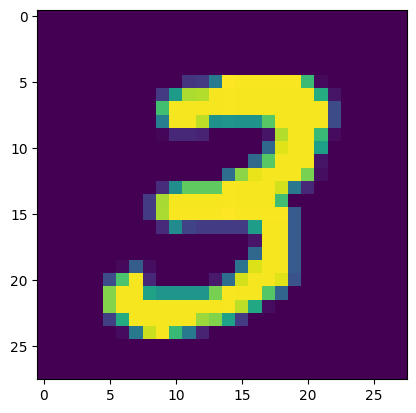

In [39]:
plt.imshow(gray_img_resize)

In [40]:
gray_img_resize =gray_img_resize/255

In [45]:
img_reshape = np.reshape(gray_img_resize, [1,28,28])

In [46]:
prediction = model.predict(img_reshape)

1/1 [==============================] - 0s 17ms/step


In [47]:
print(prediction)

[[9.0466956e-06 4.8693037e-05 6.3487957e-04 1.0000000e+00 1.9873222e-12
  3.7813712e-02 1.9779183e-15 9.5285457e-03 8.3353639e-01 8.1440246e-01]]


In [48]:
prediction_label = np.argmax(prediction)

In [49]:
prediction_label

3

**Predictive System**

In [52]:
path = input('Enter image path')

input_img = cv2.imread(path)

gray_img = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)

gray_img_resize =  cv2.resize(gray_img, (28, 28))

gray_img_resize =gray_img_resize/255

img_reshape = np.reshape(gray_img_resize, [1,28,28])

prediction = model.predict(img_reshape)

prediction_label = np.argmax(prediction)

print('The image is recognized as the digit:' , prediction_label)

Enter image path/content/predict_img.png
1/1 [==============================] - 0s 16ms/step
The image is recognized as the digit: 3
